<a href="https://colab.research.google.com/github/armandossrecife/mymachinelearning/blob/main/my_car_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

In [27]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/carros_estacionados.png

--2024-07-10 18:19:42--  https://raw.githubusercontent.com/armandossrecife/teste/main/carros_estacionados.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 515365 (503K) [image/png]
Saving to: ‘carros_estacionados.png’

carros_estacionados 100%[===================>] 503.29K  --.-KB/s    in 0.01s   

2024-07-10 18:19:42 (44.9 MB/s) - ‘carros_estacionados.png’ saved [515365/515365]



In [23]:
!sudo apt-get install fonts-arial

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-arial


# 1o teste

In [4]:
# Replace with a car detection model or a general model fine-tuned on a car dataset
model_name = "facebook/detr-resnet-50"  # Adjust the model name

url = "https://images.cars.com/cldstatic/wp-content/uploads/652168802-1436970987671.jpg"

In [5]:
image = Image.open(requests.get(url, stream=True).raw)



In [6]:
processor = DetrImageProcessor.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
model = DetrForObjectDetection.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [9]:
# convert outputs to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [ ]:
# Filter detections for cars (replace with your logic)
car_detections = []

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
  if model.config.id2label[label.item()] == "car":  # Assuming "car" class exists
    box = [round(i, 2) for i in box.tolist()]
    car_detections.append((score.item(), box))

In [14]:
# Print car detections
if car_detections:
  for score, box in car_detections:
    print(f"Detected car with confidence {round(score, 3)} at location {box}")
else:
  print("No cars detected in the image.")

Detected car with confidence 0.914 at location [44.27, 97.71, 192.12, 224.38]
Detected car with confidence 0.928 at location [744.13, 301.98, 879.32, 420.57]
Detected car with confidence 0.94 at location [394.52, 406.38, 566.51, 558.6]
Detected car with confidence 0.938 at location [0.28, 414.9, 121.05, 553.56]
Detected car with confidence 0.914 at location [598.4, 295.33, 756.18, 427.8]
Detected car with confidence 0.952 at location [263.35, 418.32, 428.19, 564.55]
Detected car with confidence 0.937 at location [103.49, 410.7, 258.96, 538.43]
Detected car with confidence 0.905 at location [925.78, 402.47, 1105.59, 534.38]
Detected car with confidence 0.93 at location [850.16, 305.93, 996.96, 431.9]
Detected car with confidence 0.928 at location [561.48, 682.0, 723.12, 779.65]


In [15]:
from PIL import Image, ImageDraw, ImageFont

# Create a copy of the image
copied_image = image.copy()

# Draw the box on the new image
draw = ImageDraw.Draw(copied_image)

font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf"
font = ImageFont.truetype(font_path, 10)

In [19]:
for each in car_detections:
  precisao = each[0]
  box = each[1]
  x1, y1, x2, y2 = box
  print(x1, y1, x2, y2)
  draw.rectangle((x1, y1, x2, y2), outline='white')

44.27 97.71 192.12 224.38
744.13 301.98 879.32 420.57
394.52 406.38 566.51 558.6
0.28 414.9 121.05 553.56
598.4 295.33 756.18 427.8
263.35 418.32 428.19 564.55
103.49 410.7 258.96 538.43
925.78 402.47 1105.59 534.38
850.16 305.93 996.96 431.9
561.48 682.0 723.12 779.65


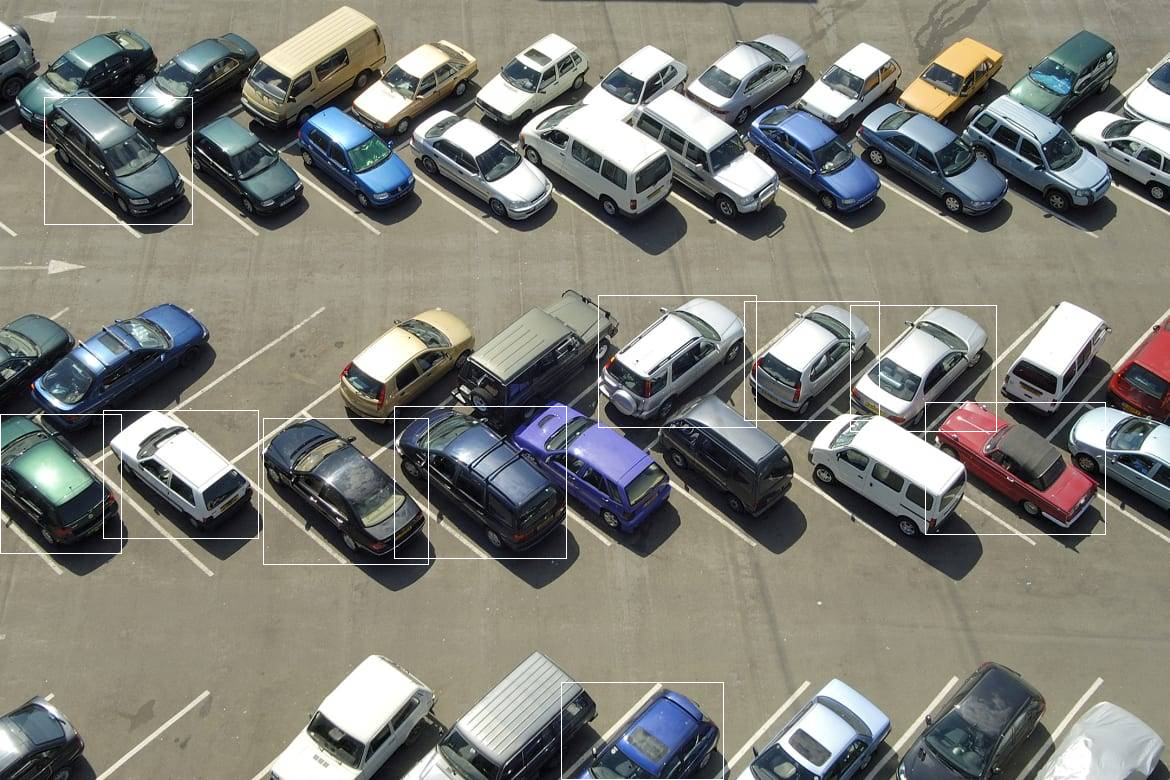

In [20]:
copied_image

# 2o. teste

In [22]:
from transformers import pipeline

object_detector = pipeline('object-detection')
object_detector(image)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

[{'score': 0.6316213011741638,
  'label': 'car',
  'box': {'xmin': 0, 'ymin': 311, 'xmax': 81, 'ymax': 408}},
 {'score': 0.5391228199005127,
  'label': 'car',
  'box': {'xmin': 681, 'ymin': 34, 'xmax': 809, 'ymax': 126}},
 {'score': 0.926621675491333,
  'label': 'truck',
  'box': {'xmin': 236, 'ymin': 4, 'xmax': 397, 'ymax': 132}},
 {'score': 0.8777565360069275,
  'label': 'truck',
  'box': {'xmin': 741, 'ymin': 676, 'xmax': 901, 'ymax': 779}},
 {'score': 0.5239585041999817,
  'label': 'truck',
  'box': {'xmin': 928, 'ymin': 401, 'xmax': 1107, 'ymax': 535}},
 {'score': 0.6491943597793579,
  'label': 'truck',
  'box': {'xmin': 928, 'ymin': 401, 'xmax': 1102, 'ymax': 534}},
 {'score': 0.7258995175361633,
  'label': 'truck',
  'box': {'xmin': 558, 'ymin': 681, 'xmax': 726, 'ymax': 779}},
 {'score': 0.9139362573623657,
  'label': 'car',
  'box': {'xmin': 44, 'ymin': 97, 'xmax': 192, 'ymax': 224}},
 {'score': 0.5476459264755249,
  'label': 'car',
  'box': {'xmin': 850, 'ymin': 109, 'xmax': 

In [24]:
my_dectection = object_detector(image)

In [25]:

from PIL import Image, ImageDraw, ImageFont

# Create a copy of the image
copied_image = image.copy()

# Draw the box on the new image
draw = ImageDraw.Draw(copied_image)

font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf"
font = ImageFont.truetype(font_path, 10)

for each in my_dectection:
  box_info = each['box']
  label = each['label']
  # Draw the box
  draw.rectangle((each['box']['xmin'], each['box']['ymin'], each['box']['xmax'], each['box']['ymax']), outline='white')
  # Get text width and height for positioning
  text_width, text_height = draw.textsize(label, font=font)

    # Calculate text position within the box (adjust based on your preference)
  text_x = box_info['xmin'] + 5  # Add a small offset from the top-left corner
  text_y = box_info['ymin'] + 5  # Add a small offset from the top-left corner

  # Draw the label text

<ipython-input-25-e778596c6c65>:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
<ipython-input-25-e778596c6c65>:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
<ipython-input-25-e778596c6c65>:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
<ipython-input-25-e778596c6c65>:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
<ipython-input-25-e778596c6c65>:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 

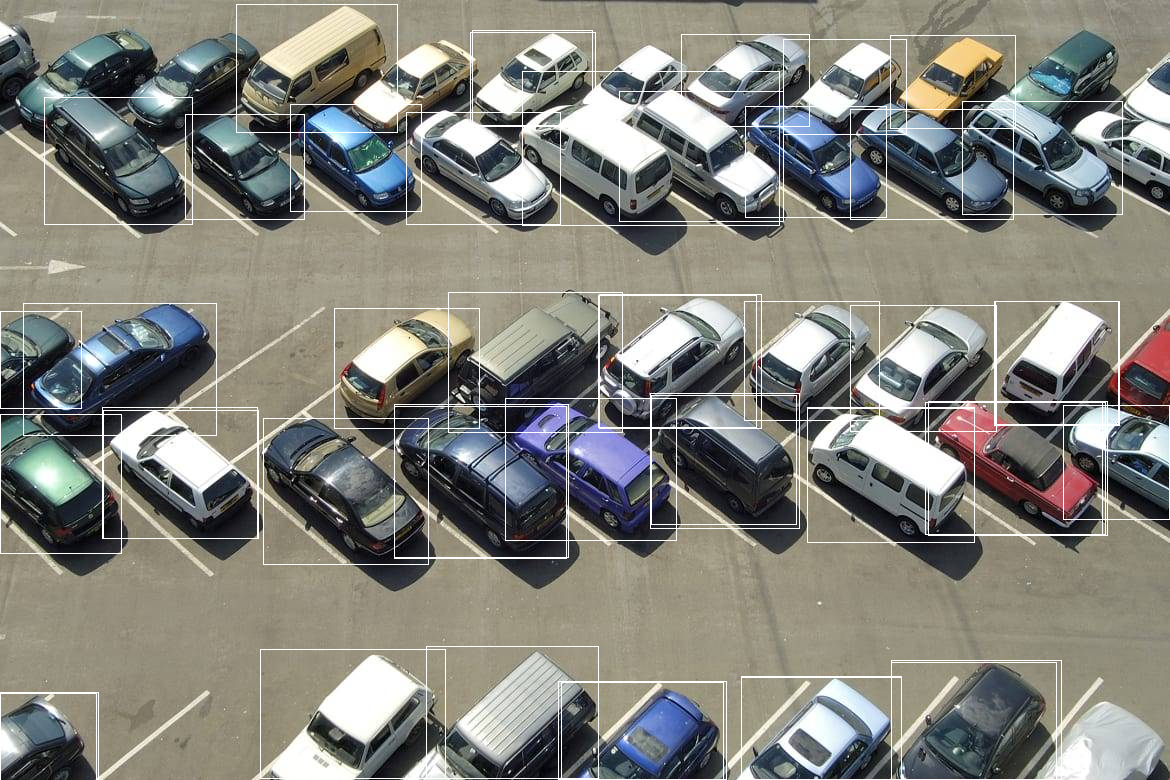

In [26]:
copied_image

# 3o. teste

In [30]:
url2 = 'https://raw.githubusercontent.com/armandossrecife/teste/main/carros_estacionados.png'

In [31]:
def get_my_image(url):
	image_data = requests.get(url, stream=True).raw
	image = Image.open(image_data)
	return image

def process_object_detector(image):
	try:
		object_detector = pipeline('object-detection')
		return object_detector(image)
	except Exception as ex:
		raise ValueError(ex)
		return None

In [33]:
def image_with_detection(image, my_dectection):
	# Create a copy of the image
	copied_image = image.copy()

	# Draw the box on the new image
	draw = ImageDraw.Draw(copied_image)

	font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf"
	font = ImageFont.truetype(font_path, 10)

	for each in my_dectection:
	  box_info = each['box']
	  label = each['label']
	  # Draw the box
	  draw.rectangle((each['box']['xmin'], each['box']['ymin'], each['box']['xmax'], each['box']['ymax']), outline='white')
	  # Get text width and height for positioning
	  text_width, text_height = draw.textsize(label, font=font)

	  # Calculate text position within the box (adjust based on your preference)
	  text_x = box_info['xmin'] + 5  # Add a small offset from the top-left corner
	  text_y = box_info['ymin'] + 5  # Add a small offset from the top-left corner

	  # Draw the label text
	  draw.text((text_x, text_y), f"{label}", fill='white', font=font)  # Adjust fill color

	return copied_image

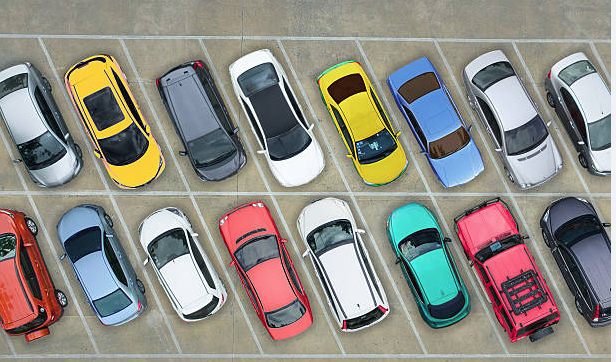

In [35]:
my_image = get_my_image(url2)
my_image

In [36]:
my_dectection = process_object_detector(my_image)
if my_dectection:
	new_image = image_with_detection(image=my_image, my_dectection=my_dectection)
else:
  print('Erro ao processar a imagem')

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForOb

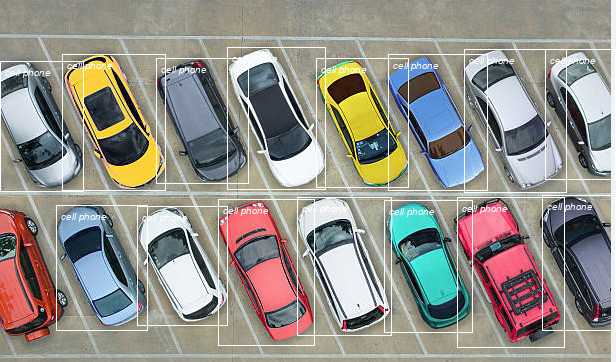

In [37]:
new_image

# 4o. teste

In [38]:
url3 = 'https://raw.githubusercontent.com/armandossrecife/teste/main/carros_estacionados2.png'

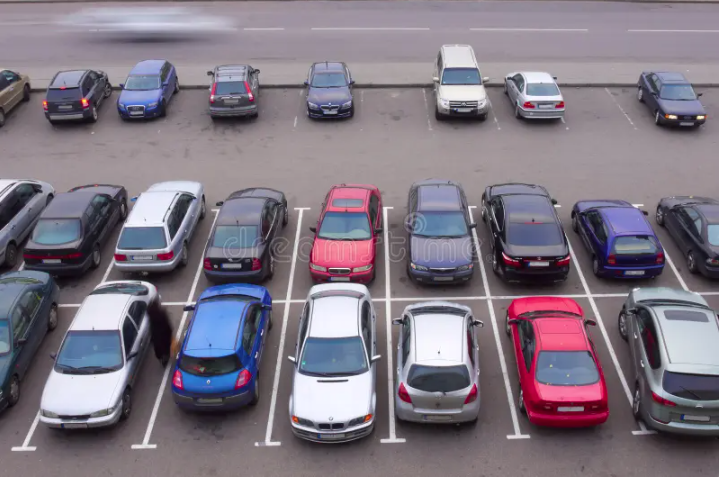

In [39]:
my_image3 = get_my_image(url3)
my_image3

In [40]:
my_dectection3 = process_object_detector(my_image3)
if my_dectection3:
	new_image3 = image_with_detection(image=my_image3, my_dectection=my_dectection3)
else:
  print('Erro ao processar a imagem')

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForOb

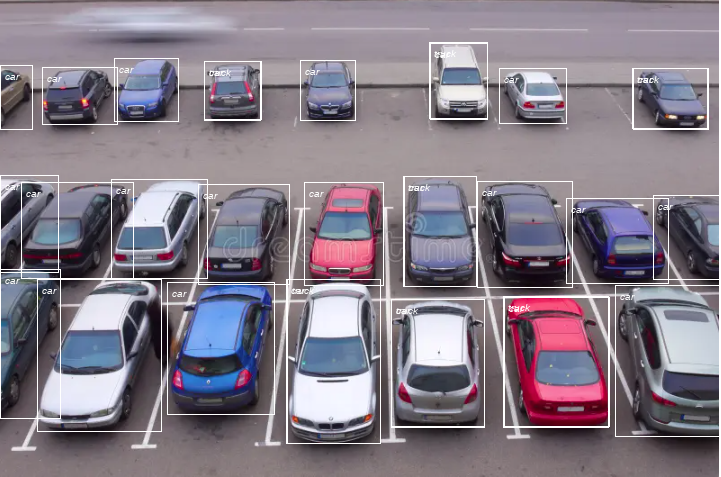

In [41]:
new_image3